### Lab 5

In [5]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import pandas as pd

In this lab, I am using the sample_pt_1000_1200 dataset to search for candidate Higgs Boson events created at the Large Hadron Collider (LHC) in CERN. The Higgs Boson is an elementary particle that explains why subatomic particles have mass. It operates on the theory that there is an energy field called the Higgs field that exists throughout the entire known universe. The masses of subatomic particles depend on their interaction(s) with the Higgs field. The Higgs field is made out of "particles" known as Higgs bosons, which "react" when subatomic particles pass through the Higgs field. The more massive a subatomic particle is, the more it interacts with the Higgs field, and therefore creates a larger reaction amongst the Higgs bosons. 

The LHC at CERN is used to detect Higgs particles. The LHC is a 27 km long particle accelerator underground Switzerland. It smashes together protons at incredibly high speeds in order to find out what the protons themselves are made out of, such as keons, pions, neutrinos, and muons. Smashing protons together also creates excitations in the Higgs field, which creates the chance that a Higgs particle is "flicked" off. The event of a Higgs particle being released is one in every ~trillion collisions. Higgs boson particles are produced with large transverse momentum (one of the variables in the data set) and decay to a quark - antiquark pair. 

From the data, the goal is to 'reconstruct' what the final state particles were from the collisions. The Atlas detector has four main segments: the tracking chamber, EM calorimeter, Hadronic calorimeter, and Muon chamber, each of which is designed to capture and record data about different types of particles from the collisions. The calorimeters are designed to 'absorb' particles, in a way that causes them to decay in a chain of different particles. The resulting particles can then be measured and used to determine what the original particle was that entered the chamber, which is considered the final state particle of interest of the collision.

A jet is a phenomenon caused by collections of collimated hadrons meaning that they are traveling in relatively the same direction. Jets are created in two ways: showering and hadronization. Showering is caused by a single quark or gluon radiating gluons. These gluons can then repeat the process or radiate more gluons, or decay (depending on the energy level). After they decay to quark - antiquark pairs, they create parton "showers". The second way jets are created are when quarks and gluons bind into hadrons. 

When the calorimeters measure the particles, the original quark or gluon is considered the final state particle of our collision. Therefore, we need to reconstruct the original quark or gluon from the jet particles that are recorded by the calorimeter. This is a very complicated process and algorithms are used to reconstruct the original particle from the jet. A number of different variables are recorded from the jets that can be used to determine properties of the final state particle. Analyzing jet mass, four-momenta, angular information, and substructure information can lead us to determine which particles were present after the proton-proton collision. What is considered a jet is determined by the algorithm being used. There are 14 different high-level variables in our data that describe the features of the jets recorded in a calorimeter. These are:

'pt': $p_t$, the transverse momentum

'eta': $\eta$, the psuedorapidity, angle of a particle relative to the beam axis, $\eta$ = -ln[tan($\theta$/2]

'phi': $\phi$, azimuthal angle around the beam

'mass': mass in GeV

'ee2': 2 point energy correlation function (ECF)

'ee3': 3 point energy correlation function

'd2': ratio, ee2/(ee3)^3

'angularity': $a_3$

't1': 1 subjettiness

't2': 2 subjettiness

't3': 3 subjettiness

't21': t2/t1, ratio of 2 subjettiness to 1 subjettiness

't32': t3/t2, ratio of 3 subjettiness to 2 subjettiness

'KtDeltaR': $k_t$$\Delta$R, $\Delta$R of two subjets within a large-R jet

We are given data from a Higgs decay, which is considered the signal. The data predicted by other QCD processes is considered to be the background.

In [9]:
plt.rcParams["figure.figsize"] = (20,60)

infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs_data = pickle.load(infile)

infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd_data = pickle.load(infile2)

# list all keys of the files
print("Higgs Signal categories: ", higgs_data.keys())
print("QCD background categories: ", qcd_data.keys())

Higgs Signal categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
QCD background categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [10]:
signal = np.array(higgs_data)
qcd = np.array(qcd_data)

In [11]:
higgs_table = pd.DataFrame(higgs_data)
qcd_table = pd.DataFrame(qcd_data)
higgs_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
qcd_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

In [12]:
higgs_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [13]:
qcd_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


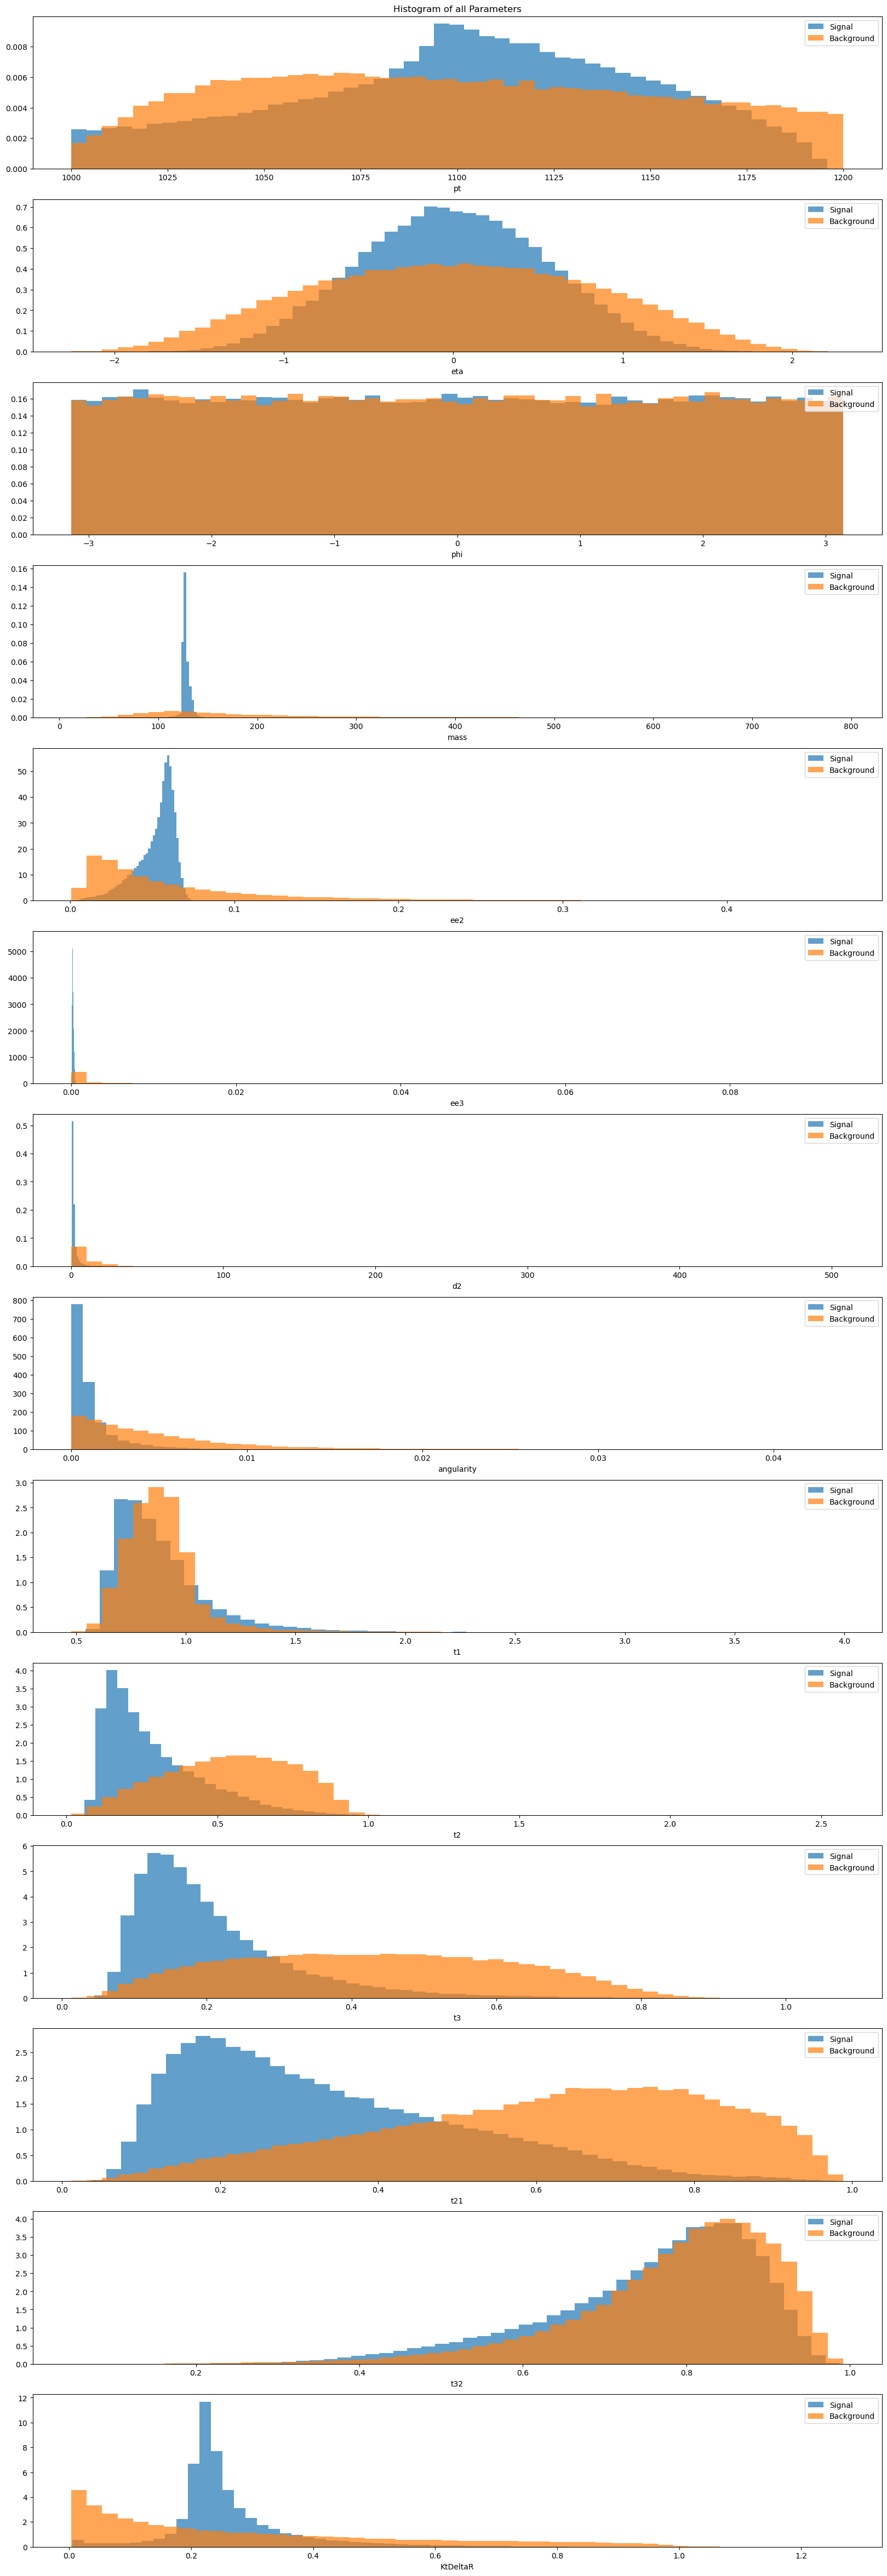

In [16]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14) = plt.subplots(14,1)
axes = (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14)
labels = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
axes[0].set_title("Histogram of all Parameters")
for i in range(0,14):
    axes[i].hist(signal[:,i],bins = 50, density = True, alpha = 0.7, label="Signal")
    axes[i].hist(qcd[:,i],bins = 50, density = True, alpha = 0.7, label = "Background")
    axes[i].set_xlabel(labels[i])
    axes[i].legend(loc = 'best')
plt.show()

Above is a set of histograms of each field for each feature in both the background and signal data sets. 

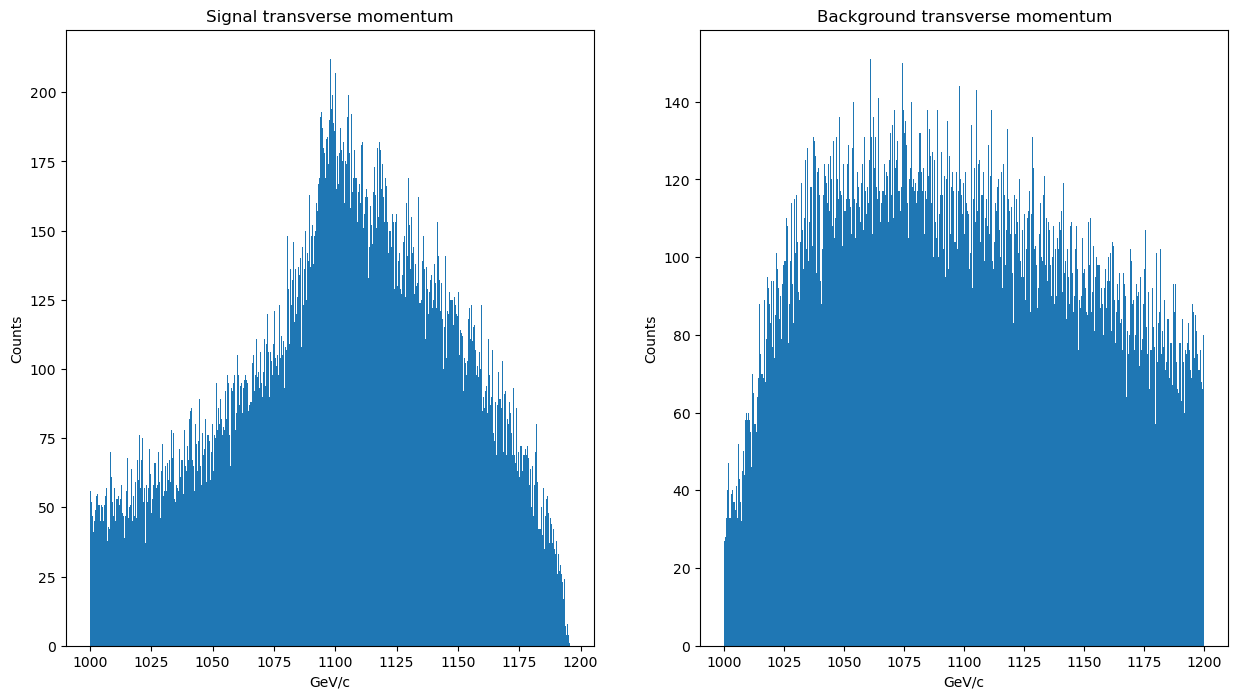

In [19]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('pt'), bins = 1000)
a[0].set_title('Signal transverse momentum')
a[0].set_ylabel('Counts')
a[0].set_xlabel('GeV/c')
a[1].hist(qcd_data.get('pt'), bins = 1000)
a[1].set_title('Background transverse momentum')
a[1].set_ylabel('Counts')
a[1].set_xlabel('GeV/c')

plt.show()

The variable pt represents the transverse momentum, which are the components of the momentum of the collision products in the plane perpindicular to the axis of the beam of particles. It is expected that most of momentum in colliding particles will cancel, so this momentum is indicative of there being other particles unaccounted for among the collision products. The signal sharply peaks at around 1000 GeV/c, which could indicate a Higgs particle being present.

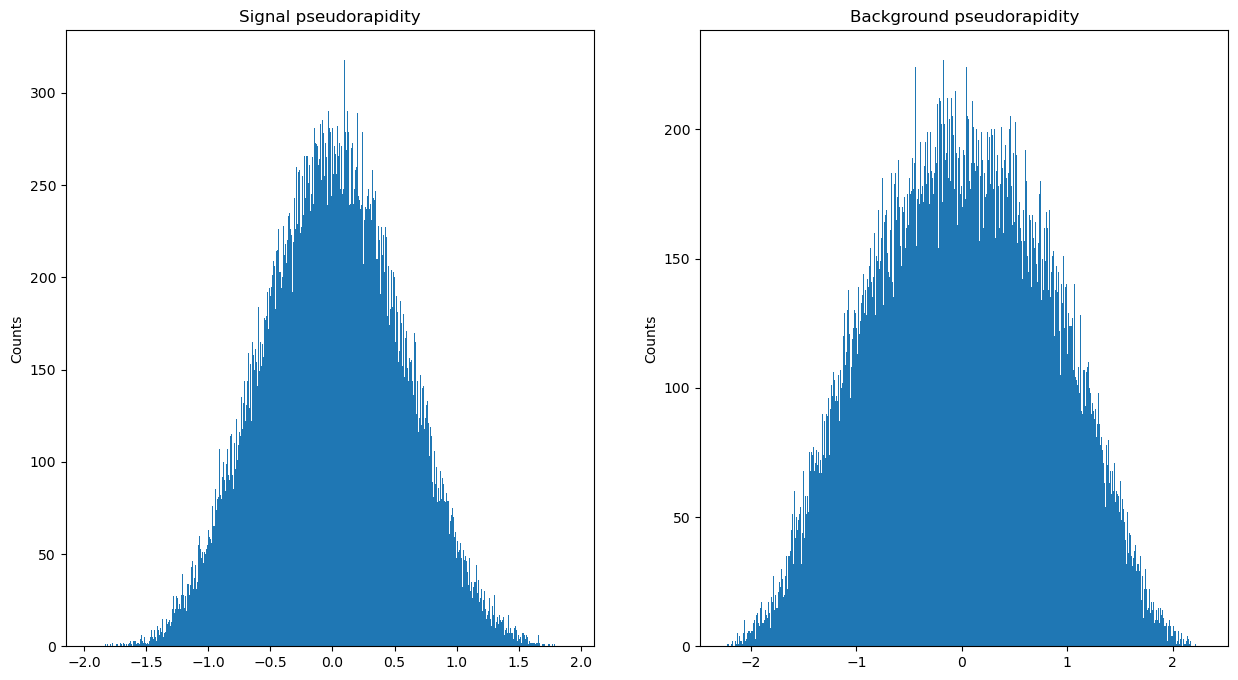

In [20]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('eta'), bins = 1000)
a[0].set_title('Signal pseudorapidity')
a[0].set_ylabel('Counts')
a[1].hist(qcd_data.get('eta'), bins = 1000)
a[1].set_title('Background pseudorapidity')
a[1].set_ylabel('Counts')

plt.show()

Pseudorapidity is a measure of the angle between the particle beam and the 3-momentum of the collision products. A larger magnitude pseudorapidity corresponds to the collision products more closely aligning with the beam.

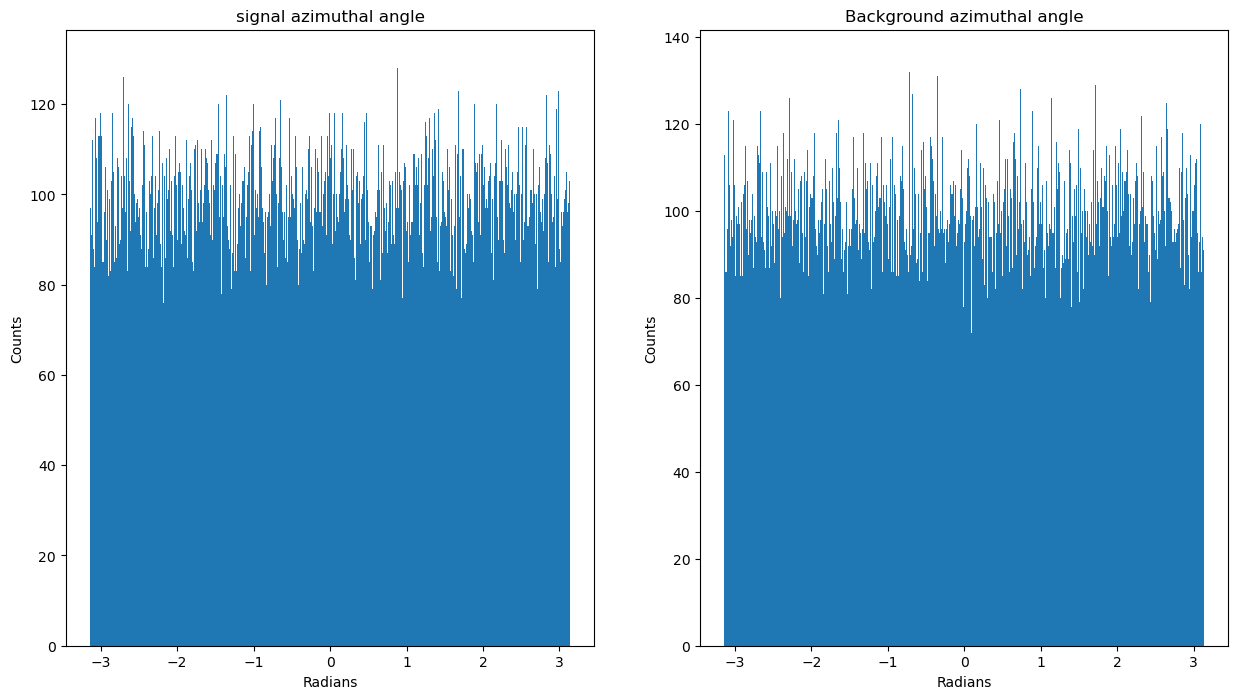

In [22]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('phi'), bins = 1000)
a[0].set_title('signal azimuthal angle')
a[0].set_ylabel('Counts')
a[0].set_xlabel('Radians')
a[1].hist(qcd_data.get('phi'), bins = 1000)
a[1].set_title('Background azimuthal angle')
a[1].set_ylabel('Counts')
a[1].set_xlabel('Radians')

plt.show()

The azimuthal angle is the angle in the transverse plane between pt and the horizontal. It helps characterize the direction of the jet.

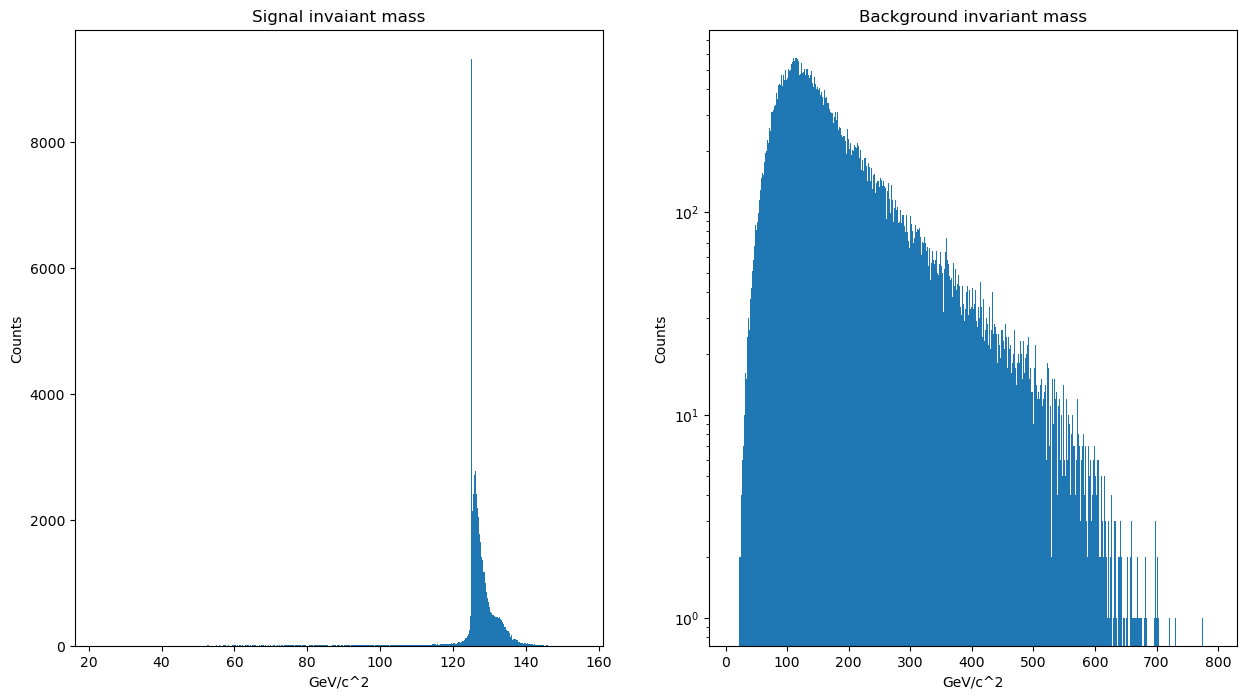

In [24]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('mass'), bins = 1000)
a[0].set_title('Signal invaiant mass')
a[0].set_ylabel('Counts')
a[0].set_xlabel('GeV/c^2')
a[1].hist(qcd_data.get('mass'), bins = 1000)
a[1].set_title('Background invariant mass')
a[1].set_ylabel('Counts')
a[1].set_xlabel('GeV/c^2')
a[1].set_yscale('log')

plt.show()

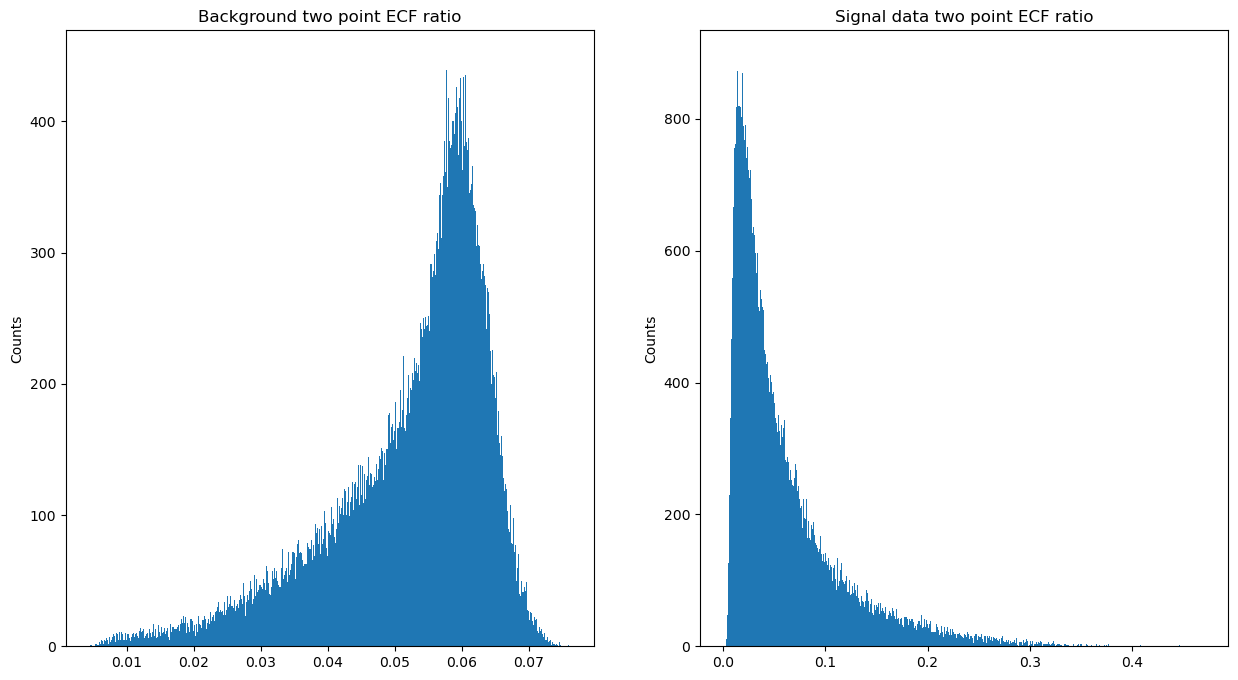

In [25]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('ee2'), bins = 1000)
a[0].set_title('Background two point ECF ratio')
a[0].set_ylabel('Counts')
a[1].hist(qcd_data.get('ee2'), bins = 1000)
a[1].set_title('Signal data two point ECF ratio')
a[1].set_ylabel('Counts')

plt.show()

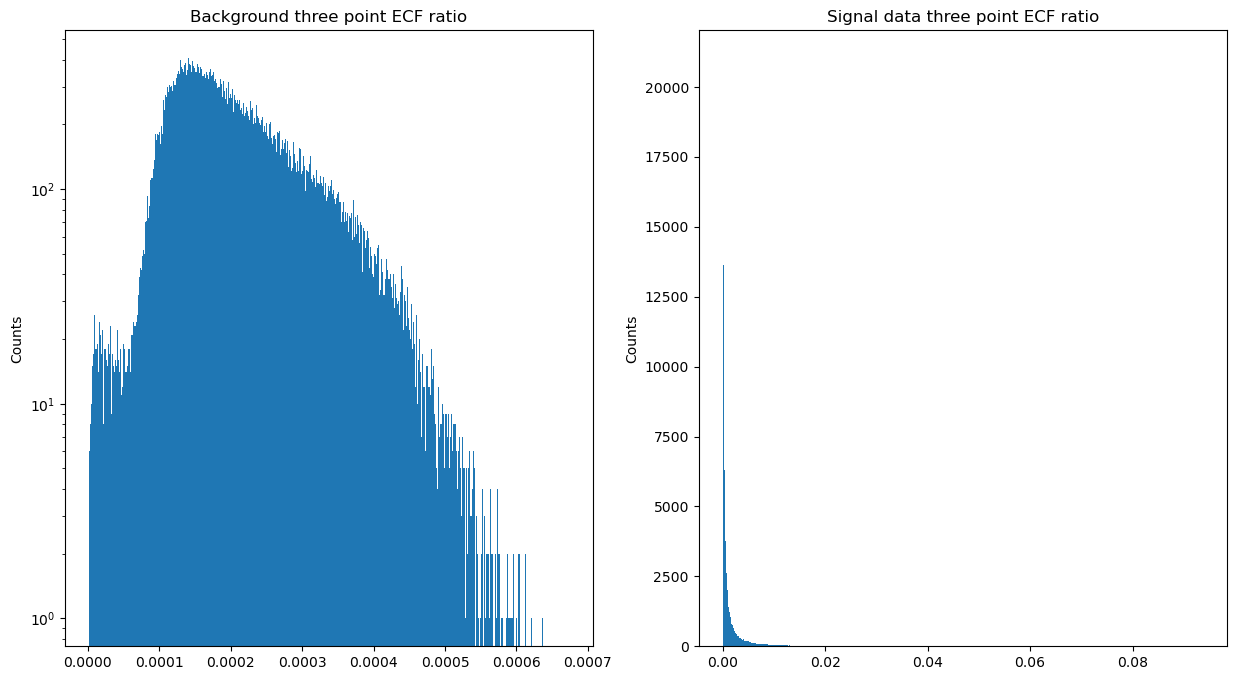

In [29]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('ee3'), bins = 1000)
a[0].set_title('Background three point ECF ratio')
a[0].set_ylabel('Counts')
a[0].set_yscale('log')
a[1].hist(qcd_data.get('ee3'), bins = 1000)
a[1].set_title('Signal data three point ECF ratio')
a[1].set_ylabel('Counts')

plt.show()

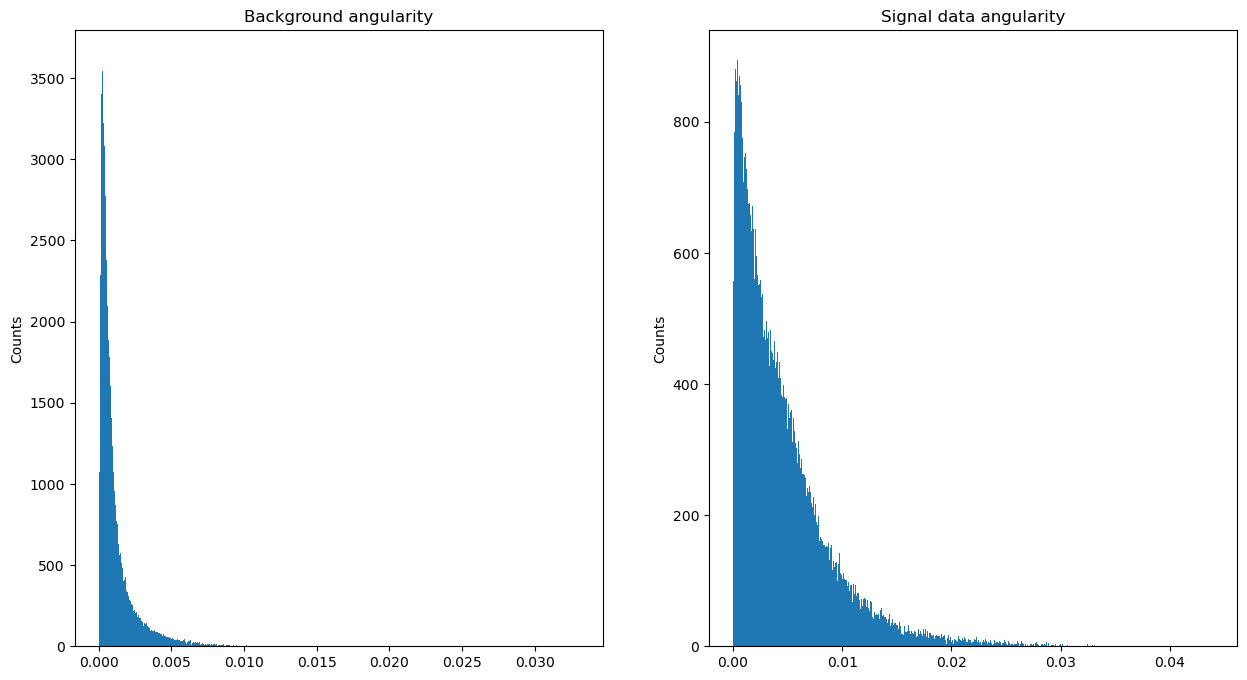

In [28]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('angularity'), bins = 1000)
a[0].set_title('Signal angularity')
a[0].set_ylabel('Counts')
a[1].hist(qcd_data.get('angularity'), bins = 1000)
a[1].set_title('Background angularity')
a[1].set_ylabel('Counts')

plt.show()

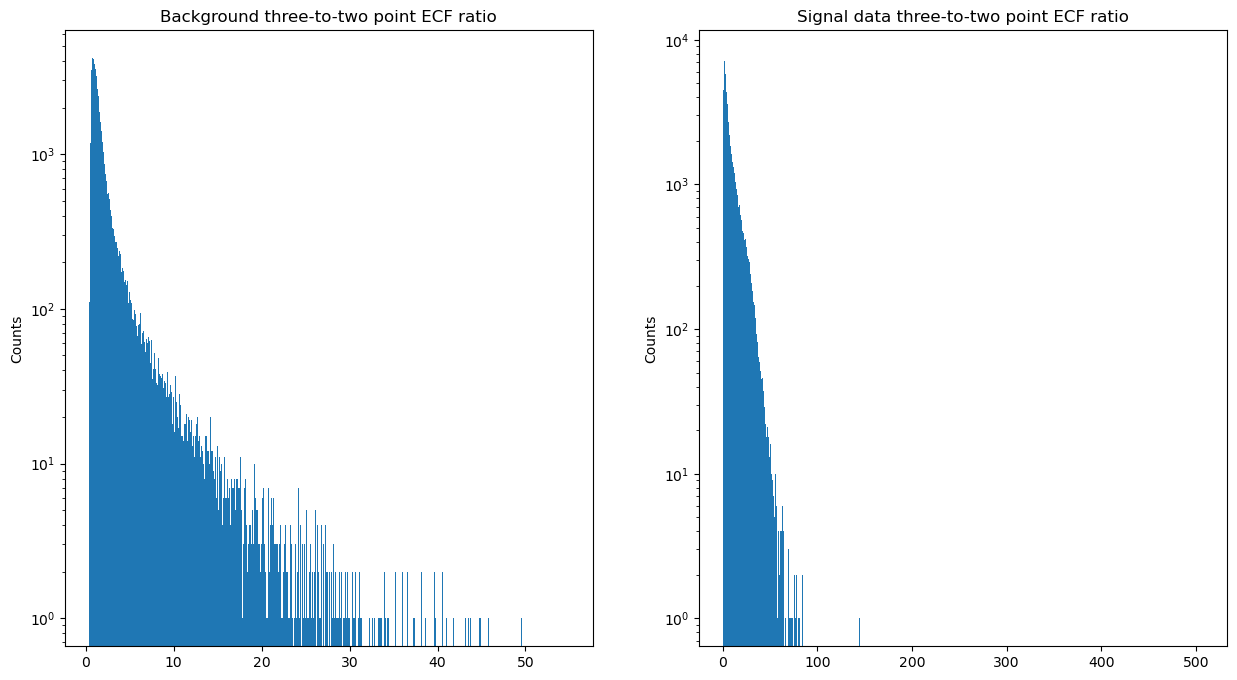

In [30]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('d2'), bins = 1000)
a[0].set_title('Background three-to-two point ECF ratio')
a[0].set_ylabel('Counts')
a[0].set_yscale('log')
a[1].hist(qcd_data.get('d2'), bins = 1000)
a[1].set_title('Signal data three-to-two point ECF ratio')
a[1].set_ylabel('Counts')
a[1].set_yscale('log')

plt.show()

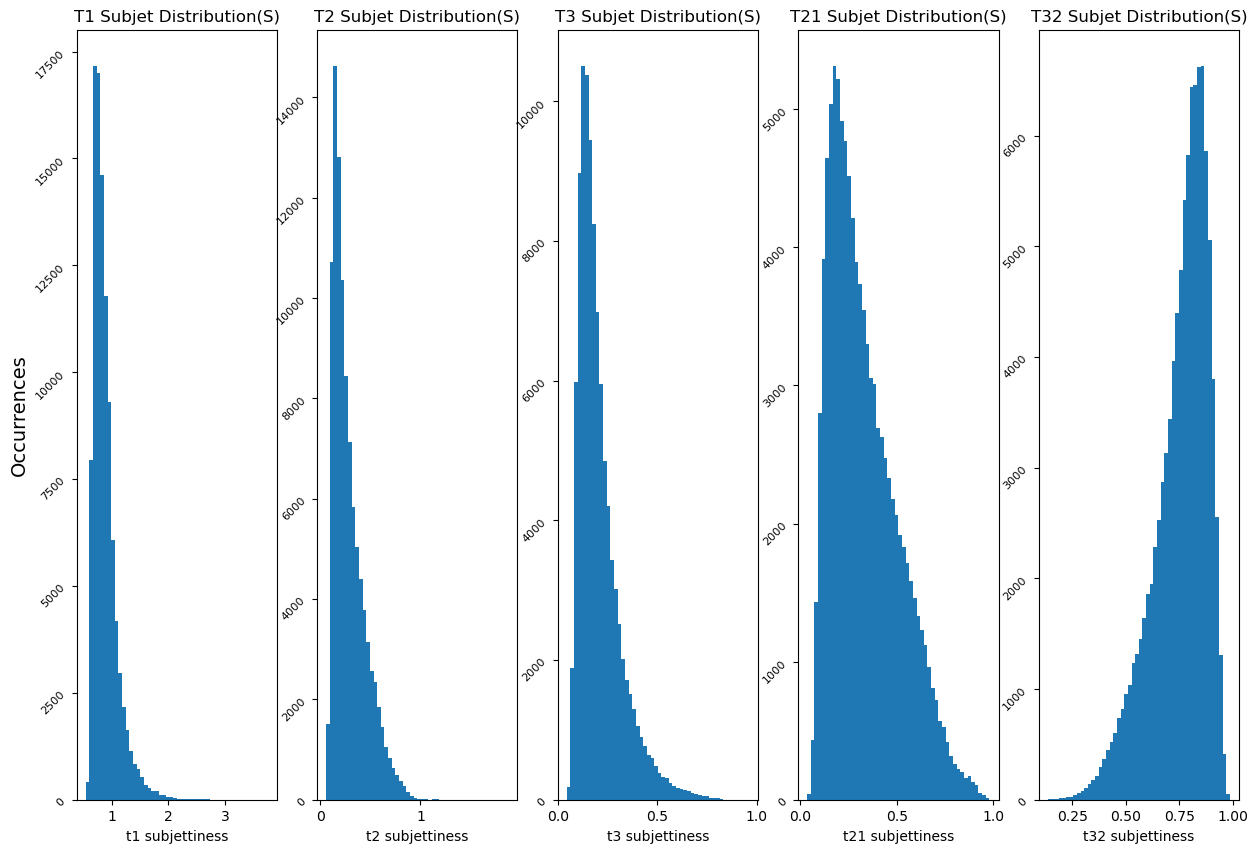

In [31]:
plt.rcParams["figure.figsize"] = (15,10)
    
bins = 50    

plt.subplot(151)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t1'][:], bins, histtype = 'bar') 
plt.xlabel('t1 subjettiness', fontsize=10) 
plt.ylabel('Occurrences', fontsize=14) 
plt.title('T1 Subjet Distribution(S)', fontsize=12) 

plt.subplot(152)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t2'][:], bins, histtype = 'bar') 
plt.xlabel('t2 subjettiness', fontsize=10) 
plt.title('T2 Subjet Distribution(S)', fontsize=12) 

plt.subplot(153)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t3'][:], bins, histtype = 'bar') 
plt.xlabel('t3 subjettiness', fontsize=10) 
plt.title('T3 Subjet Distribution(S)', fontsize=12) 

plt.subplot(154)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t21'][:], bins, histtype = 'bar') 
plt.xlabel('t21 subjettiness', fontsize=10) 
plt.title('T21 Subjet Distribution(S)', fontsize=12) 

plt.subplot(155)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t32'][:], bins, histtype = 'bar') 
plt.xlabel('t32 subjettiness', fontsize=10) 
plt.title('T32 Subjet Distribution(S)', fontsize=12) 

plt.show()

Above, the subjettiness of the signal data set is right skewed at low subjettiness, but as the subjettiness increases, the histograms slowly go towards the right, eventually coming to a left skew at 32-subjettiness.

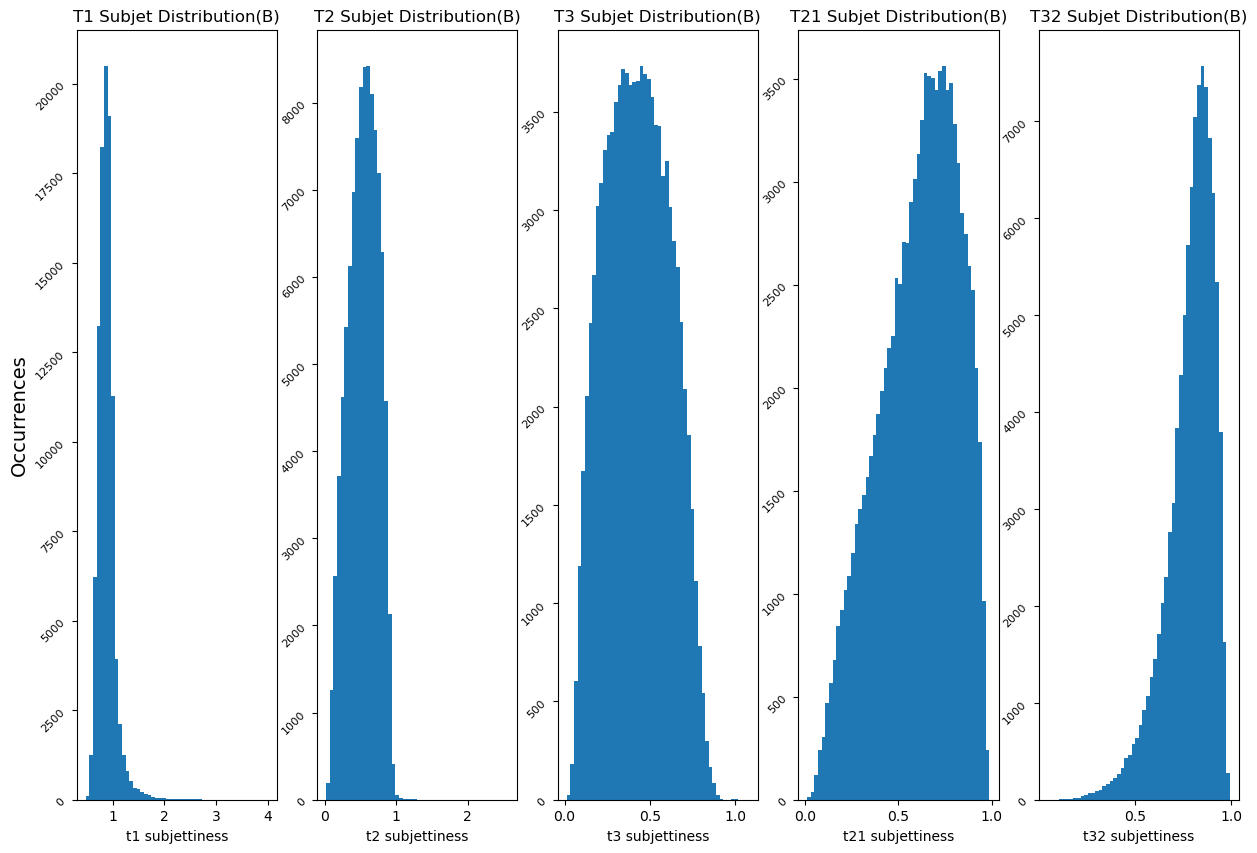

In [32]:
plt.rcParams["figure.figsize"] = (15,10)
    
bins = 50    

plt.subplot(151)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t1'][:], bins, histtype = 'bar') 
plt.xlabel('t1 subjettiness', fontsize=10) 
plt.ylabel('Occurrences', fontsize=14) 
plt.title('T1 Subjet Distribution(B)', fontsize=12) 

plt.subplot(152)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t2'][:], bins, histtype = 'bar') 
plt.xlabel('t2 subjettiness', fontsize=10) 
plt.title('T2 Subjet Distribution(B)', fontsize=12) 

plt.subplot(153)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t3'][:], bins, histtype = 'bar') 
plt.xlabel('t3 subjettiness', fontsize=10) 
plt.title('T3 Subjet Distribution(B)', fontsize=12) 

plt.subplot(154)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t21'][:], bins, histtype = 'bar') 
plt.xlabel('t21 subjettiness', fontsize=10) 
plt.title('T21 Subjet Distribution(B)', fontsize=12) 

plt.subplot(155)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t32'][:], bins, histtype = 'bar') 
plt.xlabel('t32 subjettiness', fontsize=10) 
plt.title('T32 Subjet Distribution(B)', fontsize=12) 

plt.show()

Above, a similar trend can be seen with the background data set as well. At t3, it looks very Gaussian.

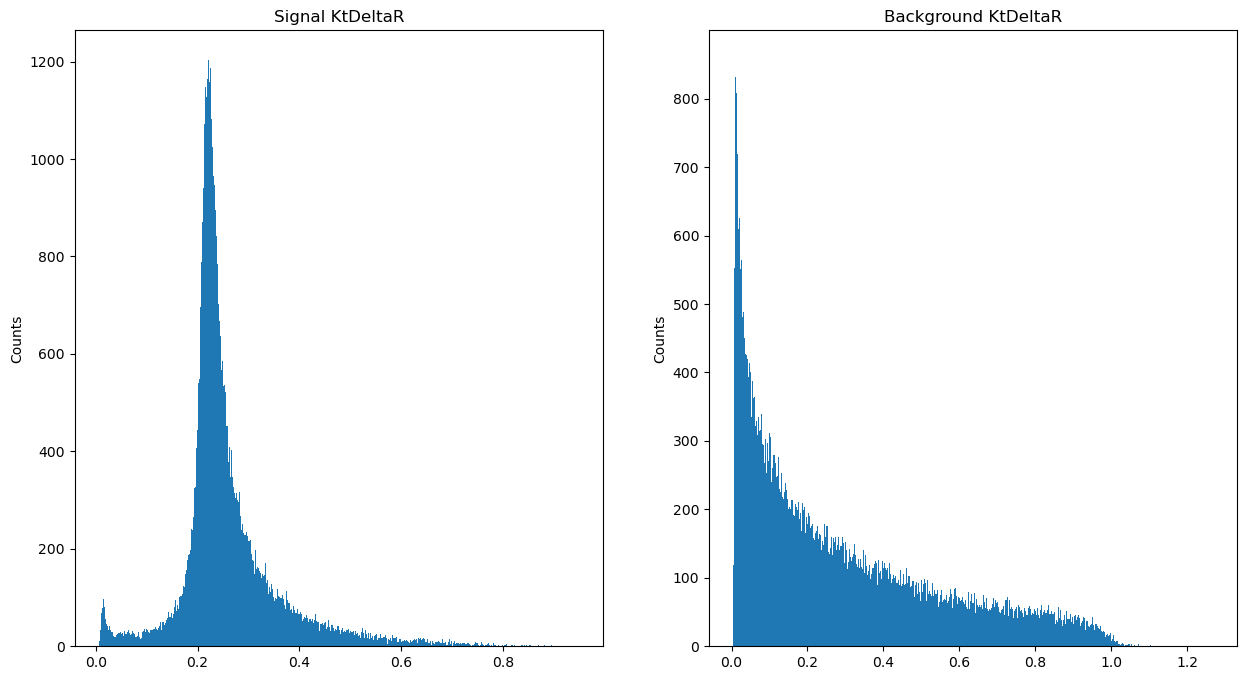

In [34]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('KtDeltaR'), bins = 1000)
a[0].set_title('Signal KtDeltaR')
a[0].set_ylabel('Counts')
a[1].hist(qcd_data.get('KtDeltaR'), bins = 1000)
a[1].set_title('Background KtDeltaR')
a[1].set_ylabel('Counts')

plt.show()

In [35]:
qcd_data.corr()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.000083,-0.006469,0.095461,0.012772,0.006981,-0.003817,0.032309,-0.010783,-0.027798,-0.033102,-0.027596,-0.024690,0.024390
eta,0.000083,1.000000,0.001784,0.000767,0.000499,0.001447,-0.002371,0.000908,-0.002803,-0.001568,-0.001840,-0.000351,-0.000405,-0.002086
phi,-0.006469,0.001784,1.000000,-0.005159,-0.003282,-0.003464,0.001273,-0.008891,0.002601,0.000465,0.001326,-0.000321,0.002848,-0.003087
mass,0.095461,0.000767,-0.005159,1.000000,0.959965,0.793991,-0.538750,0.529638,0.010450,-0.533355,-0.621826,-0.585519,-0.459640,0.708356
ee2,0.012772,0.000499,-0.003282,0.959965,1.000000,0.844699,-0.567445,0.427854,0.126657,-0.517926,-0.620038,-0.613574,-0.495083,0.614471
ee3,0.006981,0.001447,-0.003464,0.793991,0.844699,1.000000,-0.306321,0.433308,0.138780,-0.250764,-0.350501,-0.323984,-0.412092,0.459877
d2,-0.003817,-0.002371,0.001273,-0.538750,-0.567445,-0.306321,1.000000,-0.184381,-0.022127,0.554533,0.622112,0.619491,0.325022,-0.392433
angularity,0.032309,0.000908,-0.008891,0.529638,0.427854,0.433308,-0.184381,1.000000,-0.052497,-0.152266,-0.196199,-0.155062,-0.190053,0.406357
t1,-0.010783,-0.002803,0.002601,0.010450,0.126657,0.138780,-0.022127,-0.052497,1.000000,0.326725,0.238284,-0.002957,-0.146209,-0.271773
t2,-0.027798,-0.001568,0.000465,-0.533355,-0.517926,-0.250764,0.554533,-0.152266,0.326725,1.000000,0.936640,0.926364,0.129887,-0.635300


From above, the most signficiant correlated variables were:
1. mass and ee2
2. t2 and t3
3. t2 and t21
4. t3 and t21